In [3]:
import string
import random
from util import ecdf

from unidip import UniDip
import numpy as np
from Bio import motifs

import matplotlib.pyplot as plt
plt.style.use("seaborn")

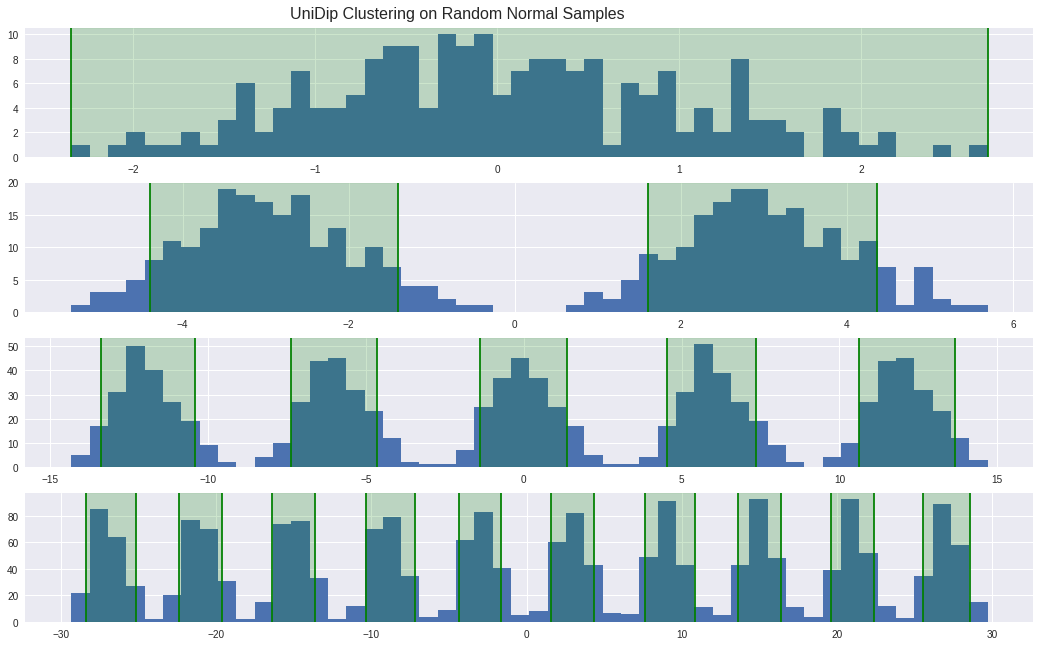

In [9]:
# no noise
dat1 = np.random.randn(200)
dat2 = np.concatenate([dat1-3, dat1+3])
dat5 = np.concatenate([dat2-9, dat1, dat2+9])
dat10 = np.concatenate([dat5-15, dat5+15])

plt.figure(figsize=[20, 10])
plt.suptitle('UniDip Clustering on Random Normal Samples', fontsize=16)
for i, d in zip([1,2,3,4], [dat1, dat2, dat5, dat10]):
    d = np.msort(d)
    plt.subplot('41' + str(i))
    plt.hist(d, bins=50)
    res = UniDip(d, merge_distance=5).run()
    for mi in res:
        plt.axvspan(d[mi[0]], d[mi[1]], color='green', alpha=0.2)
        plt.axvline(d[mi[0]], color='green')
        plt.axvline(d[mi[1]], color='green')

plt.subplots_adjust(left=0.2, wspace=0.1, top=.95)

plt.show()

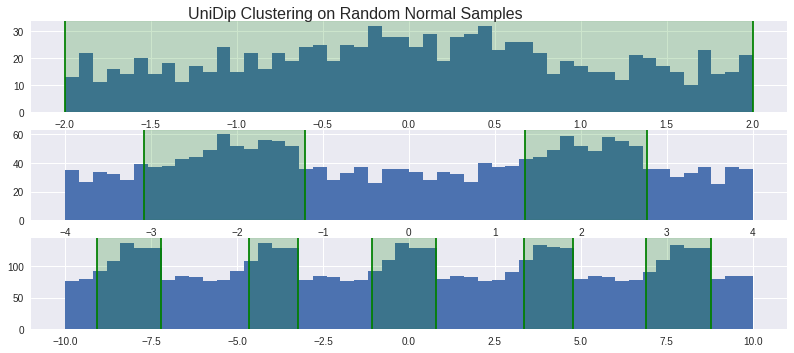

In [6]:
# yes noise
dat1 = np.concatenate([np.random.normal(0, 0.5, size=200), np.random.uniform(-2, 2, size=800)])
dat2 = np.concatenate([dat1-2, dat1+2])
dat5 = np.concatenate([dat2-6, dat1, dat2+6])
dat10 = np.concatenate([dat5-10, dat5+10])

plt.figure(figsize=[15, 7])
plt.suptitle('UniDip Clustering on Random Normal Samples', fontsize=16)
for i, d in zip([1,2,3], [dat1, dat2, dat5]):
    d = np.msort(d)
    plt.subplot('41' + str(i))
    plt.hist(d, bins=50)
    res = UniDip(d).run()
    for mi in res:
        plt.axvspan(d[mi[0]], d[mi[1]], color='green', alpha=0.2)
        plt.axvline(d[mi[0]], color='green')
        plt.axvline(d[mi[1]], color='green')

plt.subplots_adjust(left=0.2, wspace=0.1, top=.95)

plt.show()

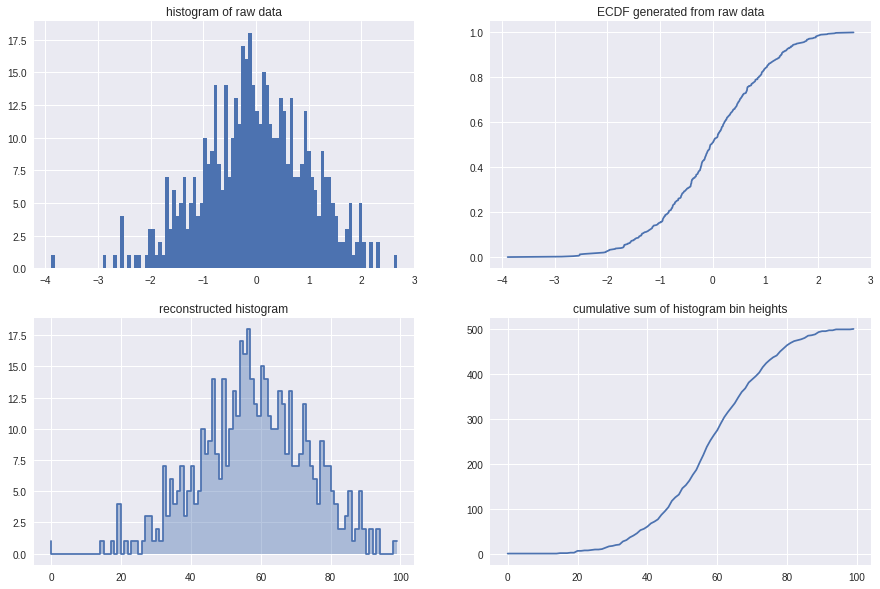

In [8]:
histdat = np.random.randn(500)
plt.figure(figsize=[15, 10])

plt.subplot('221')
plt.title('histogram of raw data')
ax = plt.hist(histdat, bins=100)

plt.subplot('222')
plt.title('ECDF generated from raw data')
plt.plot(sorted(histdat), ecdf(histdat))

plt.subplot('223')
plt.title('reconstructed histogram')
plt.step(list(range(len(ax[0]))), ax[0])
plt.fill_between(list(range(len(ax[0]))), ax[0], step="pre", alpha=.4)

plt.subplot('224')
plt.title('cumulative sum of histogram bin heights')
plt.plot(list(range(len(ax[0]))), np.cumsum(ax[0]))

plt.show()

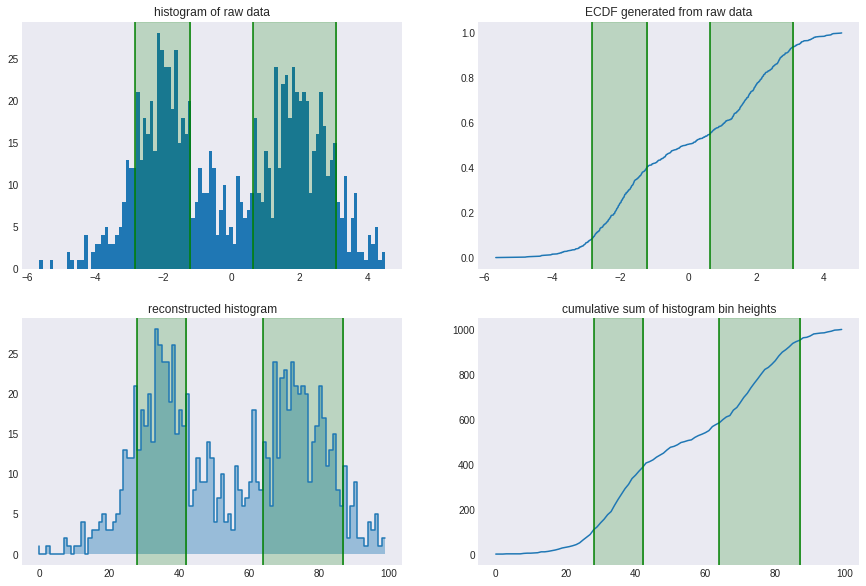

In [8]:
histdat2 = np.concatenate([np.random.normal(-2,1,500), np.random.normal(2,1,500)])

resn = UniDip(histdat2).run()
d = sorted(histdat2)

plt.figure(figsize=[15, 10])

plt.subplot('221')
plt.title('histogram of raw data')
ax = plt.hist(histdat2, bins=100)
for mi in resn:
    plt.axvspan(d[mi[0]], d[mi[1]], color='green', alpha=0.2)
    plt.axvline(d[mi[0]], color='green')
    plt.axvline(d[mi[1]], color='green')
    
plt.subplot('222')
plt.title('ECDF generated from raw data')
plt.plot(sorted(histdat2), ecdf(histdat2))
for mi in resn:
    plt.axvspan(d[mi[0]], d[mi[1]], color='green', alpha=0.2)
    plt.axvline(d[mi[0]], color='green')
    plt.axvline(d[mi[1]], color='green')

resh = UniDip(ax[0], is_hist=True).run()

plt.subplot('223')
plt.title('reconstructed histogram')
plt.step(list(range(len(ax[0]))), ax[0])
plt.fill_between(list(range(len(ax[0]))), ax[0], step="pre", alpha=.4)
for mi in resh:
    plt.axvspan(mi[0], mi[1], color='green', alpha=0.2)
    plt.axvline(mi[0], color='green')
    plt.axvline(mi[1], color='green')

plt.subplot('224')
plt.title('cumulative sum of histogram bin heights')
plt.plot(list(range(len(ax[0]))), np.cumsum(ax[0]))
for mi in resh:
    plt.axvspan(mi[0], mi[1], color='green', alpha=0.2)
    plt.axvline(mi[0], color='green')
    plt.axvline(mi[1], color='green')

plt.show()